
# Project: Loan Data from Prosper

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.**: 

After exploring the database we will be able to answer the following questions:

1.• What is the most amount of loans based on time, category, borrowers state, occupation & employment status?

2.• What factors affect a loan’s outcome status?

3.• What do you advise investors for the next period?

In [177]:
#import statements for all of the packages
import numpy as np
import pandas as pd
import random

<a id='wrangling'></a>

## Data Wrangling


### General Properties

1.• The dataset (Loan Data from Prosper) shape: <ul><li> rows = 9669 <li>columns = 81</ul>  

2.• My vision for answering the above questions will be included to analyzing a package of quantitative and categorical data.
   <ol><li>Quantitative data: <ul><li>Term<li>Borrower APR<li>Borrower Rate<li>Prosper Score
    <li>Listing Category (numeric)<li>Credit Score Range Lower<li>Credit Score Range Upper
    <li>Debt To Income Ratio<li>Stated Monthly Income<li>Loan Original Amount</ul>
    <li>Categorical data:<ul><li>Credit Grade<li>Loan Status<li>Prosper Rating (Alpha)<li>Listing Category<li>Borrower State
    <li>Occupation<li>Employment Status<li>Is Borrower Homeowner<li>Loan Origination Quarter</ul></ol>

3.• Cleaning process:<br> Some variables have a lot of null values, and a lot of other variables associated with the Prosper history of the debtor, i'll do my best to calculate and fill the cells to get biggest sample possible.

In [178]:
# Load your data and print out 10 lines. Perform operations to inspect data
df = pd.read_csv('prosperLoanData.csv', error_bad_lines=False, engine='python')
pd.set_option("display.max_columns", len(df.columns))

In [179]:
#Examine columns, missing values, and data types
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.092

In [180]:
print(df.shape)

(9669, 81)


In [181]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9669 entries, 0 to 9668
Data columns (total 81 columns):
ListingKey                             9669 non-null object
ListingNumber                          9669 non-null int64
ListingCreationDate                    9669 non-null object
CreditGrade                            2417 non-null object
Term                                   9669 non-null int64
LoanStatus                             9669 non-null object
ClosedDate                             4664 non-null object
BorrowerAPR                            9668 non-null float64
BorrowerRate                           9669 non-null float64
LenderYield                            9669 non-null float64
EstimatedEffectiveYield                7241 non-null float64
EstimatedLoss                          7241 non-null float64
EstimatedReturn                        7241 non-null float64
ProsperRating (numeric)                7241 non-null float64
ProsperRating (Alpha)                  7241 non-

In [182]:
print(df.dtypes)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom


### Data Cleaning  Steps


1.• Replace all categorical data with (Unknown) instead of null.

2.• Calculate & replace all quantitative data with (mean) instead of null.

3.• Drop null values from columns.

4.• Replace remining null values by zeros.

5.• Delete unnecessary columns.

6.• There is no duplicate.

7.• Change data type to (Loan Origination Quarter) from object to numeric & replace name to release_year.

8.• Add profit column (profit column = Loan Original Amount * Borrower Rate).

9.• The sample is (9034 rows * 24 columns) cleaned & ready to analysis).

10.• Save new dataset as(prosperLoanData_v1.csv) for analysis exploratory.


In [183]:
#categorical date 
#fill all variables (object) datatype with (unknown) as a value
df_cat = df.select_dtypes(include=["object"]).columns.values
df[df_cat] = df[df_cat].fillna("Unknown")

In [184]:
#double check  variables (object) datatype has null values
df.select_dtypes(include=["object"]).isnull().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [185]:
#exploring null values in countitive data 
df.select_dtypes(include=[np.number]).isnull().sum()

ListingNumber                             0
Term                                      0
BorrowerAPR                               1
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield                2428
EstimatedLoss                          2428
EstimatedReturn                        2428
ProsperRating (numeric)                2428
ProsperScore                           2428
ListingCategory (numeric)                 0
EmploymentStatusDuration                635
CreditScoreRangeLower                    51
CreditScoreRangeUpper                    51
CurrentCreditLines                      635
OpenCreditLines                         635
TotalCreditLinespast7years               57
OpenRevolvingAccounts                     0
OpenRevolvingMonthlyPayment               0
InquiriesLast6Months                     57
TotalInquiries                          101
CurrentDelinquencies                     57
AmountDelinquent                

In [186]:
#delete unnecessary identifiers variables in the analysis process
df.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber"], axis=1, inplace=True)

In [ ]:
#calculate & fill missing quantitive data by mean
#refer to the document to know the definition of variables

In [187]:
#Borrower APR = Borrower Rate + borrower fees 
borrower_fees = df["BorrowerAPR"] - df["BorrowerRate"]
borrower_fees.mean()

0.026091508067852709

In [188]:
#fill all (BorrowerAPR) cells
df["BorrowerAPR"].fillna(df["BorrowerRate"] + borrower_fees.mean(), inplace=True)

In [189]:
#double check filling all (BorrowerAPR) cells
df["BorrowerAPR"].isnull().sum()

0

In [190]:
#EstimatedEffectiveYield = borrower rate - expected loss from interest charge-offs and fees.
estimated_loss_from_fees = df["BorrowerRate"] - df["EstimatedEffectiveYield"]
estimated_loss_from_fees.mean()

0.027363607236569536

In [191]:
#fill all (EstimatedEffectiveYield) cells
df["EstimatedEffectiveYield"].fillna(df["BorrowerRate"] - estimated_loss_from_fees.mean(), inplace=True)

In [192]:
#double check filling all (EstimatedEffectiveYield) cells
df["EstimatedEffectiveYield"].isnull().sum()

0

In [193]:
#fill all (EstimatedLoss) cells with mean of (EstimatedLoss)
df["EstimatedLoss"].fillna(df["EstimatedLoss"].mean(), inplace=True)

In [194]:
#double check filling all (EstimatedLoss) cells
df["EstimatedLoss"].isnull().sum()

0

In [195]:
#filling EstimatedReturn by (EstimatedEffectiveYield - EstimatedLoss).
df["EstimatedReturn"].fillna(df["EstimatedEffectiveYield"] - df["EstimatedLoss"], inplace=True)

In [84]:
#double check filling all (EstimatedReturn) cells
df["EstimatedReturn"].isnull().sum()

0

In [196]:
#fill all (ProsperRating (numeric)) cells with mean.
df["ProsperRating (numeric)"].fillna(df["ProsperRating (numeric)"].mean(), inplace=True)

In [197]:
#double check filling all (ProsperRating (numeric) cells
df["ProsperRating (numeric)"].isnull().sum()

0

In [198]:
#fill all (ProsperScore) cells with mean.
df["ProsperScore"].fillna(df["ProsperScore"].mean(), inplace=True)

In [199]:
#double check filling all (ProsperScore) cells.
df["ProsperScore"].isnull().sum()

0

In [200]:
#delete null cells from package of columns. 
df.dropna(subset=["EmploymentStatusDuration", "CreditScoreRangeLower", "FirstRecordedCreditLine", "CurrentCreditLines",
"TotalCreditLinespast7years"], inplace=True)

In [201]:
#display null values to variable(DebtToIncomeRatio)
df_debt_income_null = df[df["DebtToIncomeRatio"].isnull()]
#display five rows
df_debt_income_null[:5]

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
40,2014-01-27 12:02:57.523000000,Unknown,60,Current,Unknown,0.19630,0.1725,0.1625,0.151630,0.072400,0.079230,4.000000,C,4.000000,1,WA,Other,Self-employed,276.0,False,False,Unknown,2014-01-25 10:47:25,680.0,699.0,1985-12-20 00:00:00,10.0,9.0,28.0,10,1233.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,61284.0,0.46,69166.0,28.0,1.00,2.0,NaN,"$100,000+",False,12750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,15000,2014-01-29 00:00:00,Q1 2014,ACFF370458072043753CE79,374.81,374.8100,162.14,212.6700,-12.33,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,3.0
69,2014-01-25 12:07:54.537000000,Unknown,60,Current,Unknown,0.13636,0.1139,0.1039,0.099890,0.034900,0.064990,6.000000,A,11.000000,1,IL,Investor,Self-employed,12.0,True,True,Unknown,2014-01-25 11:51:41,700.0,719.0,1995-08-01 00:00:00,5.0,5.0,21.0,3,373.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19961.0,0.79,5039.0,21.0,1.00,0.0,NaN,"$25,000-49,999",False,2700.0,3.0,16.0,16.0,0.0,0.0,7861.0,0.02,NaN,0,NaN,2,9000,2014-01-29 00:00:00,Q1 2014,87D0340317005703964722E,197.44,194.6315,115.99,78.6415,-7.15,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0
78,2008-06-29 23:23:40.157000000,A,36,Chargedoff,2009-04-09 00:00:00,0.18454,0.1700,0.1600,0.142636,0.080097,0.062539,4.087281,Unknown,5.944207,3,CA,Realtor,Full-time,68.0,True,False,Unknown,2008-06-29 23:13:04.860000000,720.0,739.0,1995-11-29 00:00:00,14.0,14.0,26.0,9,962.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,33572.0,0.73,9355.0,24.0,1.00,1.0,NaN,$0,False,0.0,1.0,6.0,6.0,0.0,0.0,7750.0,6725.84,0.0,1918,9.0,68,4800,2008-07-08 00:00:00,Q3 2008,D77734052911579724BCDD5,171.13,684.5200,418.38,266.1400,-15.66,0.00,4381.62,4381.62,0.0,1.0,0.0,0.0,0.0,115.0
100,2013-01-25 11:48:26.040000000,Unknown,36,Chargedoff,2013-08-30 00:00:00,0.35356,0.3134,0.3034,0.276000,0.157500,0.118500,1.000000,HR,3.000000,13,CA,Other,Not employed,12.0,False,False,Unknown,2013-01-11 12:10:13,720.0,739.0,2000-09-10 00:00:00,3.0,3.0,10.0,3,56.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5641.0,0.22,19359.0,4.0,1.00,1.0,NaN,Not employed,False,0.0,1.0,11.0,7.0,4.0,0.0,5000.0,3802.10,-47.0,314,7.0,14,4000,2013-01-30 00:00:00,Q1 2013,CEE83539008163122ED9B62,172.76,345.5200,144.77,200.7500,-6.41,0.00,3855.23,3855.23,0.0,1.0,0.0,0.0,0.0,73.0
103,2012-04-17 11:58:52.270000000,Unknown,36,Chargedoff,2013-03-22 00:00:00,0.26681,0.2287,0.2187,0.213400,0.099000,0.114400,3.000000,D,2.000000,3,CO,Truck Driver,Self-employed,29.0,True,False,Unknown,2012-04-17 11:58:46,680.0,699.0,1993-10-26 00:00:00,9.0,7.0,21.0,1,699.0,0.0,0.0,0.0,

In [202]:
#display all variables value for debtor number 40 only
df.loc[40]

ListingCreationDate                    2014-01-27 12:02:57.523000000
CreditGrade                                                  Unknown
Term                                                              60
LoanStatus                                                   Current
ClosedDate                                                   Unknown
BorrowerAPR                                                   0.1963
BorrowerRate                                                  0.1725
LenderYield                                                   0.1625
EstimatedEffectiveYield                                      0.15163
EstimatedLoss                                                 0.0724
EstimatedReturn                                              0.07923
ProsperRating (numeric)                                            4
ProsperRating (Alpha)                                              C
ProsperScore                                                       4
ListingCategory (numeric)         

In [203]:
#display debtor(40) vs column(MonthlyLoanPayment)
df.loc[40, "MonthlyLoanPayment"]

374.81

In [204]:
#this debtor has both debt and income data available.
#display debtor(40) vs column(StatedMonthlyIncome)
df.loc[40, "StatedMonthlyIncome"]

12750.0

In [205]:
#double check of other casees 
df_debt_income_ratio = df[df["DebtToIncomeRatio"].isnull()]

In [206]:
#all these data points have a (monthly loan payment & stated monthly income).
df_debt_income_ratio["MonthlyLoanPayment"].isnull().sum(), df_debt_income_null["StatedMonthlyIncome"].isnull().sum()

(0, 0)

In [207]:
#calculate the Debt to Income ratio based on the stated monthly income
#Calculate DebtToIncomeRatio for unverifiable incomes, adding $1 to account for $0/month incomes
df["DebtToIncomeRatio"].fillna(df["MonthlyLoanPayment"] / (df["StatedMonthlyIncome"] + 1), inplace = True)

In [208]:
#double check filling all (DebtToIncomeRatio) cells
df["DebtToIncomeRatio"].isnull().sum()

0

In [209]:
#Prosper histories variables
null_values = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
                "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

In [210]:
# fill the missing Prosper histories with 0s
df[null_values] = df[null_values].fillna(0)

In [211]:
#double check filling all (prosper_vars) cells
df.isnull().sum()

ListingCreationDate                       0
CreditGrade                               0
Term                                      0
LoanStatus                                0
ClosedDate                                0
BorrowerAPR                               0
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield                   0
EstimatedLoss                             0
EstimatedReturn                           0
ProsperRating (numeric)                   0
ProsperRating (Alpha)                     0
ProsperScore                              0
ListingCategory (numeric)                 0
BorrowerState                             0
Occupation                                0
EmploymentStatus                          0
EmploymentStatusDuration                  0
IsBorrowerHomeowner                       0
CurrentlyInGroup                          0
GroupKey                                  0
DateCreditPulled                

In [212]:
#It doesn't really make sense to replace the Null values with a 0. 
#the most conservative approach will be to drop the both columns entirely
df.drop(["ScorexChangeAtTimeOfListing", "LoanFirstDefaultedCycleNumber"], axis=1, inplace=True)

In [213]:
#delete package of unnecessary variables, due it out of our analysis vision
df.drop(["PercentFunded", "Recommendations", "InvestmentFromFriendsCount", "InvestmentFromFriendsAmount", "Investors"], axis=1, inplace=True)

In [214]:
#the sample shape now(9034*70) is cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9034 entries, 0 to 9668
Data columns (total 70 columns):
ListingCreationDate                    9034 non-null object
CreditGrade                            9034 non-null object
Term                                   9034 non-null int64
LoanStatus                             9034 non-null object
ClosedDate                             9034 non-null object
BorrowerAPR                            9034 non-null float64
BorrowerRate                           9034 non-null float64
LenderYield                            9034 non-null float64
EstimatedEffectiveYield                9034 non-null float64
EstimatedLoss                          9034 non-null float64
EstimatedReturn                        9034 non-null float64
ProsperRating (numeric)                9034 non-null float64
ProsperRating (Alpha)                  9034 non-null object
ProsperScore                           9034 non-null float64
ListingCategory (numeric)              9034 no

In [215]:
#delete all extra (47 variables) only will leave the (23 variables) that answer our questions
df.drop(["ListingCreationDate", "ClosedDate", "DateCreditPulled", "LoanOriginationDate", "MemberKey", "LoanCurrentDaysDelinquent", 
         "LoanMonthsSinceOrigination", "LP_CustomerPayments", "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", 
         "LP_CollectionFees", "LP_GrossPrincipalLoss", "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments", "EmploymentStatusDuration", 
         "CurrentlyInGroup", "GroupKey", "FirstRecordedCreditLine", "CurrentCreditLines", "OpenCreditLines", "TotalCreditLinespast7years", 
         "OpenRevolvingAccounts", "OpenRevolvingMonthlyPayment", "InquiriesLast6Months", "TotalInquiries", "CurrentDelinquencies", 
         "AmountDelinquent", "DelinquenciesLast7Years", "PublicRecordsLast10Years", "PublicRecordsLast12Months", "RevolvingCreditBalance", 
         "BankcardUtilization", "AvailableBankcardCredit", "TotalTrades", "TradesNeverDelinquent (percentage)", "TradesOpenedLast6Months", 
         "IncomeRange", "IncomeVerifiable", "TotalProsperLoans", "TotalProsperPaymentsBilled", "OnTimeProsperPayments", 
         "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", 
         "ProsperPrincipalOutstanding", "MonthlyLoanPayment"], axis=1, inplace=True)

In [216]:
#the sample shape now(9034*23) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9034 entries, 0 to 9668
Data columns (total 23 columns):
CreditGrade                  9034 non-null object
Term                         9034 non-null int64
LoanStatus                   9034 non-null object
BorrowerAPR                  9034 non-null float64
BorrowerRate                 9034 non-null float64
LenderYield                  9034 non-null float64
EstimatedEffectiveYield      9034 non-null float64
EstimatedLoss                9034 non-null float64
EstimatedReturn              9034 non-null float64
ProsperRating (numeric)      9034 non-null float64
ProsperRating (Alpha)        9034 non-null object
ProsperScore                 9034 non-null float64
ListingCategory (numeric)    9034 non-null int64
BorrowerState                9034 non-null object
Occupation                   9034 non-null object
EmploymentStatus             9034 non-null object
IsBorrowerHomeowner          9034 non-null bool
CreditScoreRangeLower        9034 non-n

In [217]:
#check for duplicates in the data
sum(df.duplicated())

0

In [218]:
#delete all text values(Q1,Q2,Q3 & Q4) from (LoanOriginationQuarter) variable
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].str.replace('Q1', '')
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].str.replace('Q2', '')
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].str.replace('Q3', '')
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].str.replace('Q4', '')
#display (LoanOriginationQuarter) after cleaning
df['LoanOriginationQuarter']

0        2007
1        2014
3        2012
4        2013
5        2013
6        2013
7        2013
8        2013
9        2013
10       2012
11       2007
12       2014
13       2013
14       2013
15       2012
16       2013
18       2013
19       2013
20       2013
21       2007
22       2013
23       2013
24       2013
25       2013
26       2013
27       2010
28       2013
29       2014
30       2012
31       2012
        ...  
9634     2007
9635     2012
9636     2012
9637     2011
9638     2012
9639     2013
9640     2007
9643     2010
9646     2009
9647     2014
9648     2013
9649     2013
9650     2010
9651     2013
9652     2013
9653     2014
9654     2014
9655     2013
9656     2014
9657     2007
9659     2010
9660     2007
9661     2014
9662     2007
9663     2013
9664     2012
9665     2011
9666     2008
9667     2007
9668     2011
Name: LoanOriginationQuarter, Length: 9034, dtype: object

In [219]:
#change data type from object to numeric
df["LoanOriginationQuarter"] = pd.to_numeric(df["LoanOriginationQuarter"])

In [220]:
#rename column LoanOriginationQuarter to release_year
df.rename(index=str, columns={"LoanOriginationQuarter": "release_year"}, inplace=True)

In [221]:
#Add profit column 
df.LoanOriginalAmount * df.BorrowerRate
df['profit'] = df.LoanOriginalAmount * df.BorrowerRate

In [222]:
#the sample shape now(9034*24) is cleaned & ready to analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9034 entries, 0 to 9668
Data columns (total 24 columns):
CreditGrade                  9034 non-null object
Term                         9034 non-null int64
LoanStatus                   9034 non-null object
BorrowerAPR                  9034 non-null float64
BorrowerRate                 9034 non-null float64
LenderYield                  9034 non-null float64
EstimatedEffectiveYield      9034 non-null float64
EstimatedLoss                9034 non-null float64
EstimatedReturn              9034 non-null float64
ProsperRating (numeric)      9034 non-null float64
ProsperRating (Alpha)        9034 non-null object
ProsperScore                 9034 non-null float64
ListingCategory (numeric)    9034 non-null int64
BorrowerState                9034 non-null object
Occupation                   9034 non-null object
EmploymentStatus             9034 non-null object
IsBorrowerHomeowner          9034 non-null bool
CreditScoreRangeLower        9034 non-null f

In [223]:
#save new datasets
df2 = df.to_csv('prosperLoanData_v1.csv', index=False)

In [224]:
#import Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 7.5)})

In [225]:
#display the sample (prosperLoanData_v1.csv)
df2 = pd.read_csv('prosperLoanData_v1.csv')
pd.set_option("display.max_columns", len(df2.columns))
df2.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,release_year,profit
0,C,36,Completed,0.16516,0.1580,0.1380,0.130636,0.080097,0.050539,4.087281,Unknown,5.944207,0,CO,Other,Self-employed,True,640.0,659.0,0.17,3083.333333,9425,2007,1489.15
1,Unknown,36,Current,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,A,7.000000,2,CO,Professional,Employed,False,680.0,699.0,0.18,6125.000000,10000,2014,920.00
2,Unknown,36,Current,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,A,9.000000,16,GA,Skilled Labor,Employed,True,800.0,819.0,0.15,2875.000000,10000,2012,974.00
3,Unknown,36,Current,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,D,4.000000,2,MN,Executive,Employed,True,680.0,699.0,0.26,9583.333333,15000,2013,3127.50
4,Unknown,60,Current,0.15425,0.1314,0.1214,0.115670,0.044900,0.070770,5.000000,B,10.000000,1,NM,Professional,Employed,True,740.0,759.0,0.36,8333.333333,15000,2013,1971.00


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 \ The most amount of loans:  
<br>by time:The period after 2012 is considered the boom era in investment loans
    <br>by category: Most category of loans have market share are
    <ul><li>Debt Consolidation<li>Not Available<li>Other<li>Business<li>Home Improvement</ul> 
    <br>by borrowers state
    <ul><li>CA State<li>FL State<li>IL State<li>NY State<li>GA State</ul>
   <br>by occupation 
   <ul><li>Other<li>Professional<li>Computer Programmer<li>Administrative Assistant<li>Sales - Commission</ul>
   <br>by employment status
    <ul><li>Full-time<li>Employed<li>Self-employed<li>Part-time <li>Other</ul>

### Research Question 2 \ The factors affect a loan’s outcome status:
  <br>Borrower State
    <ul><li>Loans to borrowers in (Kentucky) defaulted 40% of the time
    <li>loans to borrowers in (Washington) defaulted 17.64% of the time</ul>
      <br>Listing Category loan
    <ul><li>Wedding loans defaulting 33.33% of the time
    <li>RV loans defaulting 100% of the time also baby loan
    <li>While people seem to completely pay boat and motorcycle loans quite frequently</ul>
      <br>Employment Status
    <ul><li>Part-time employees defaulted less often than full-time employees
    <li>Employment status Other defaulted  more  than those not employed, retired & self-employed</ul>
<br>Stated Monthly Income
<ul><li>People with higher stated incomes defaulted less often than those with lower incomes</ul>
<br>Debt To Income Ratio
<ul><li>Peoples always default when the ratio of debt to income is higher</ul>
    
    
### Research Question 3 \  advisies to investors for the next period:
 <br>I think that I going to advise investors to continue investing in lending during the next period due to several reasons,  <br>the most important of which are the following:
    <ul><li>The strong & positive relationship between the Loan Original Amount & Stated Monthly Income 
    <li>The  strong & positive relationship between the Loan Original Amount & Profit 
    <li>The strong rise of Loan Original Amount & Stated Monthly Income after 2010 to 2014.
    <li>The average of debt-to-income ratio falls sharply after 2012 to 2013 and then gradually declines during 2014
    <li>The capital turnover for last 3 years recorded 19%</ul> 
    


### Univariate Exploration

* We can see growth in number of loans from (300 in 2007) to (987 in 2008) increased more than threefold
* There’s a huge slump in (2009), then it began to increase in (2010) until it returns almost as before & reaches (655 in 2011)
* Post 2011, we can see the dramatic rise in the number of loans 
* In a just 3 years, we can see the  rise in the number of loans nearly doubling from (1655 in 2012) to (2963 in 2013) 
* In 2014, it drops almost rate of (30%) what it was last year, and recorded 1042 loans
* The total number of loans during the period (2007:2014) is 9034
* Almost half of the number of loans after 2012

In [226]:
#count values of loans with Loan Origination Quarter
df2["release_year"].value_counts()

2013    2963
2012    1655
2014    1042
2008     978
2011     955
2007     803
2010     475
2009     163
Name: release_year, dtype: int64

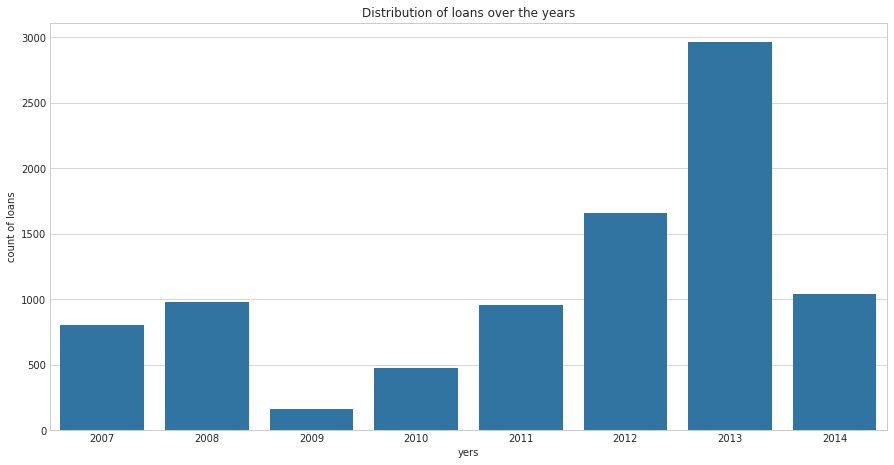

In [227]:
#specify the base_color for bars
base_color = sns.color_palette()[0]
#countplot to Loan Origination Quarter & call base_color
sns.countplot(data = df2, x = 'release_year', color=base_color);
#Labeling the graph : x axis
plt.xlabel('yers')
#Labeling the graph : y axis
plt.ylabel('count of loans')
#Labeling the graph Title
plt.title('Distribution of loans over the years');

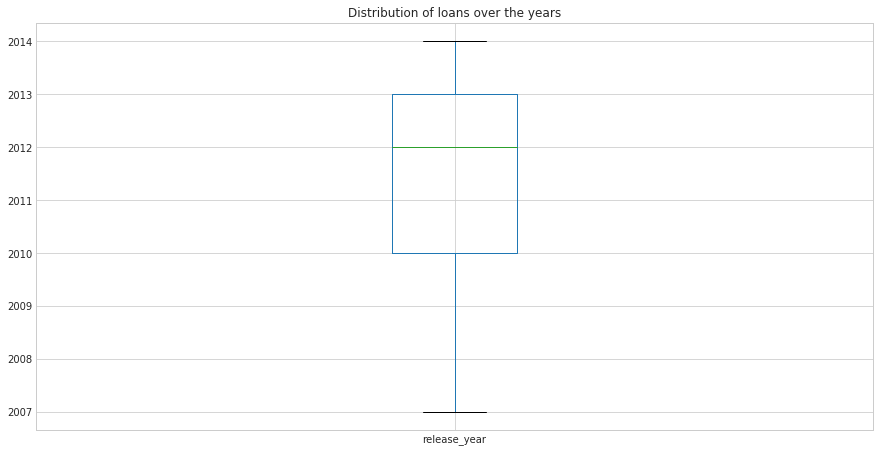

In [228]:
#box plot with parameter (LoanOriginationQuarter) 
df2['release_year'].plot(kind='box')
#Labeling the plot title
plt.title('Distribution of loans over the years');

### Since there is no certin way of knowing whether or not current loans will eventually default.
* We cannot use current loans for our analysis. almost half of the dataset is not useful to us. 
* I will drop current loan and use the remaining data to predict defaults or pay back ingeneral.

In [229]:
#count values of loans with loan status
df2["LoanStatus"].value_counts()

Current                   4820
Completed                 2857
Chargedoff                 896
Defaulted                  276
Past Due (1-15 days)        67
Past Due (31-60 days)       40
Past Due (16-30 days)       22
Past Due (91-120 days)      21
FinalPaymentInProgress      20
Past Due (61-90 days)       14
Past Due (>120 days)         1
Name: LoanStatus, dtype: int64

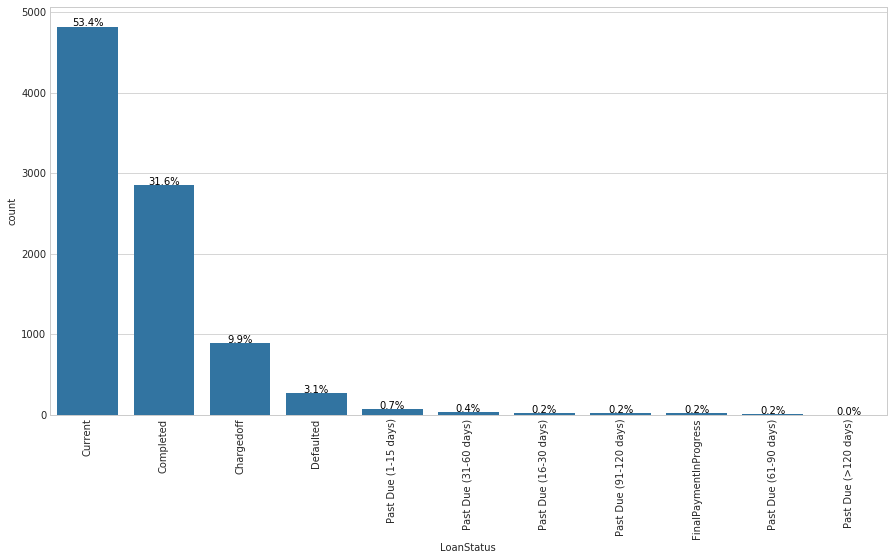

In [230]:
#specify the base_color for bars
base_color = sns.color_palette()[0]
#descending order for value count of loan status
df_ln_order = df2['LoanStatus'].value_counts().index
sns.countplot(data = df2, x = 'LoanStatus', color = base_color, order = df_ln_order);

# Recalculating the loan status_counts just to have clarity.
LoanStatus_counts = df2['LoanStatus'].value_counts()

#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = LoanStatus_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df2.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
     
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 14,4

In [231]:
#double check of (current) proportion:select rows parameter = Current / count rows for new dataset (df2)
df2.query('LoanStatus == "Current"').shape[0]/df2.shape[0]

0.5335399601505424

In [232]:
#new dataset icluding (loan satus) without (current loan)
df3 = df2[df2["LoanStatus"] != "Current"]

In [233]:
#count values of loans with loan status for newest dataset df3 without current loans
df3["LoanStatus"].value_counts()

Completed                 2857
Chargedoff                 896
Defaulted                  276
Past Due (1-15 days)        67
Past Due (31-60 days)       40
Past Due (16-30 days)       22
Past Due (91-120 days)      21
FinalPaymentInProgress      20
Past Due (61-90 days)       14
Past Due (>120 days)         1
Name: LoanStatus, dtype: int64

# Unfortunately, 
### we can notice in Credit Grade are 2431 cells was a null and we filled it by unknown value, which raises our reservations about this variable. 
### So, it will not indicate anything, especially since the other grades are close.

In [234]:
#count values of loans with Credit Grade
df3["CreditGrade"].value_counts()

Unknown    2432
C           353
B           341
D           338
AA          222
A           220
E           160
HR          148
Name: CreditGrade, dtype: int64

### Almost half of borrowers are homeowners
### We will see later whether this will affect the payment or not 

In [235]:
#count values of loans with Borrower Homeowner status
df3["IsBorrowerHomeowner"].value_counts()

False    2188
True     2026
Name: IsBorrowerHomeowner, dtype: int64

# Good news
### Full-time and employed status values give sense of safety & high confidence in predicting a non-default. 
### This is tentative good, so we will see that.

In [237]:
#count values of loans with Employment Status
df3["EmploymentStatus"].value_counts()

Full-time        2097
Employed         1594
Self-employed     263
Part-time          81
Other              79
Retired            61
Not employed       39
Name: EmploymentStatus, dtype: int64

# Good observation:
### We notice that a very large percentage of borrowers are from California.

In [238]:
#count values of loans with Borrower State & display first 10 records only
df3["BorrowerState"].value_counts()[:10]

CA         564
FL         264
IL         243
NY         217
GA         214
TX         202
OH         189
Unknown    143
WA         138
VA         126
Name: BorrowerState, dtype: int64

### Other & Professional they are the most borrowed Occupations. 

In [239]:
#count values of loans with Occupation & display first 10 records only
df3["Occupation"].value_counts()[:10]

Other                       1090
Professional                 496
Computer Programmer          178
Administrative Assistant     160
Sales - Commission           154
Analyst                      148
Executive                    146
Teacher                      134
Clerical                     124
Sales - Retail               122
Name: Occupation, dtype: int64

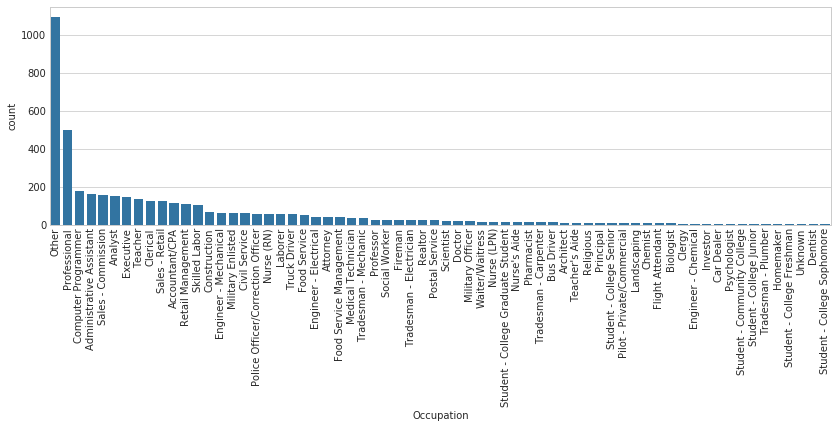

In [240]:
#specify the base_color for bars
base_color = sns.color_palette()[0]
#descending order for value count of Occupation
df_ln_order = df3['Occupation'].value_counts().index
#countplot to Occupation & call base_color & df_ln_order
sns.countplot(data = df3, x = 'Occupation', color=base_color, order = df_ln_order);
#get the current tick locations and labels rotate vertical 
locs, labels = plt.xticks(rotation=90) 

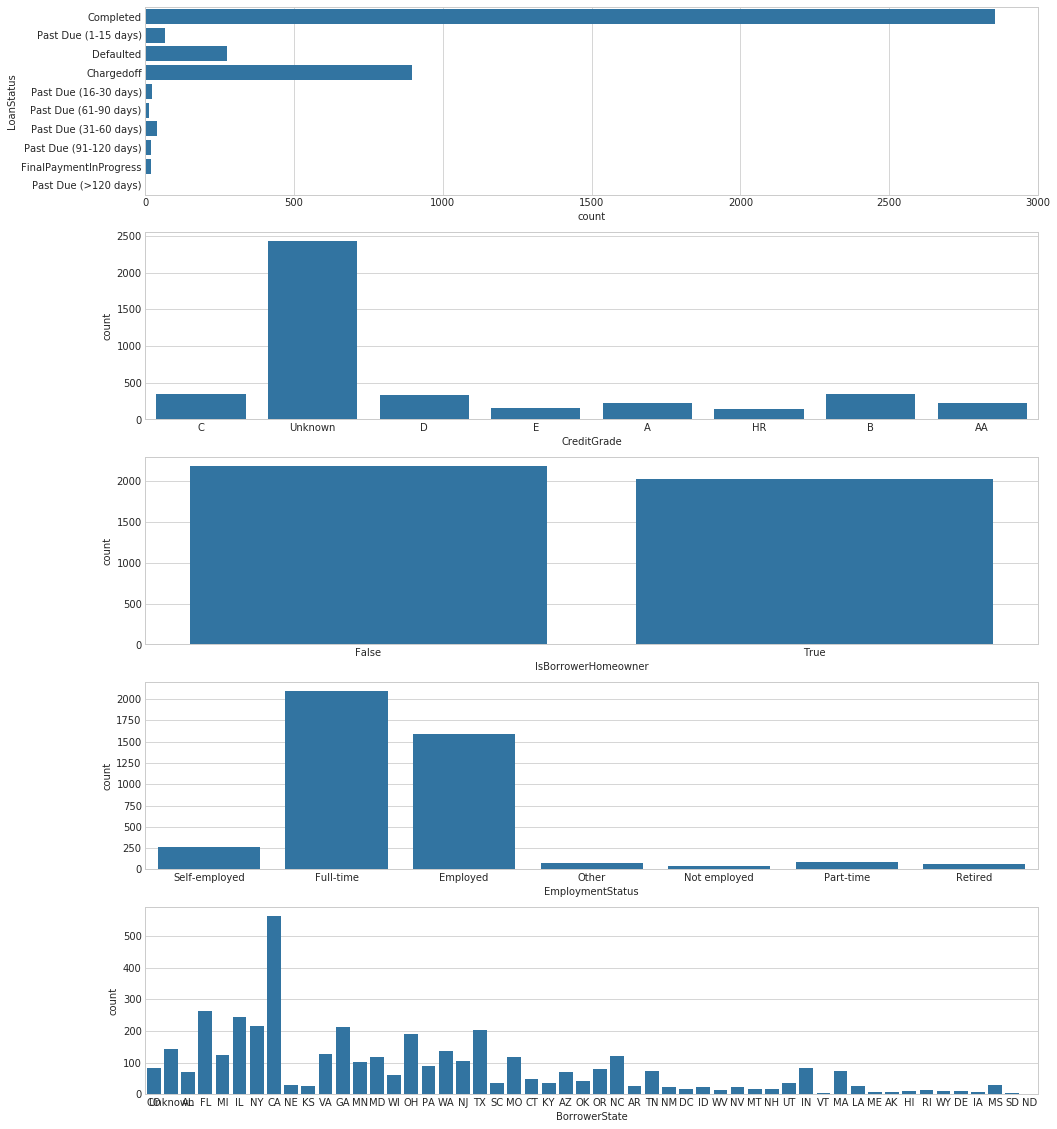

In [241]:
#set the number of parameters & size of graph
fig, ax = plt.subplots(nrows=5, figsize = [16,20])
#specify the base_color for bars
base_color = sns.color_palette()[0]
#call the parameters with base color in count plots
sns.countplot(data = df3, y = 'LoanStatus', color=base_color, ax = ax[0])
sns.countplot(data = df3, x = 'CreditGrade', color=base_color, ax = ax[1])
sns.countplot(data = df3, x = 'IsBorrowerHomeowner', color=base_color, ax = ax[2])
sns.countplot(data = df3, x = 'EmploymentStatus', color=base_color, ax = ax[3])
sns.countplot(data = df3, x = 'BorrowerState', color=base_color, ax = ax[4])

* Let's assume that all loans that are (past due, chargedoff and defaulted) will default.
* We will therefore remain with two categories (completed & defaulted).
* Let's encode these binary results as 1 and 0, respectively.

In [242]:
#encode all completed loans as 1, and all past due, chargedoff and defaulted loans as 0
df3["LoanStatus"] = (df3["LoanStatus"] == "Completed").astype(int)
df3["LoanStatus"][:10]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0     1
10    1
11    0
14    0
19    1
21    0
24    1
25    1
28    1
31    1
Name: LoanStatus, dtype: int64

(0, 1)

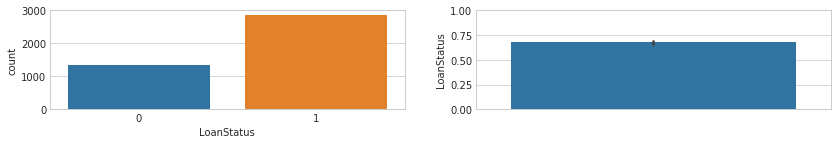

In [243]:
fig = plt.figure()
#plot on left
ax1 = fig.add_subplot(221)
#countplot with LoanStatus for 0 & 1 values
sns.countplot(df3["LoanStatus"])
#plot on right
ax2 = fig.add_subplot(222)
#barplot with LoanStatus & set y-axis limit from 0 to 1
sns.barplot(y=df3["LoanStatus"]).set_ylim([0,1])

* 67.68% of loans are completed.
* 32.20% of loans are defaulted.

In [244]:
#mean of completed loan = (sum of all value 1 / count of loans tatus)
#mean of defaulted loan = (1 - mean of completed loan)
df3["LoanStatus"].mean(), 1 - df3["LoanStatus"].mean()

(0.67797816801139055, 0.32202183198860945)

In [245]:
#descriptive statistics for numerical variables
df3.describe()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,release_year,profit
count,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000
mean,37.549122,0.677978,0.228669,0.204323,0.194117,0.168567,0.088982,0.092946,3.808613,6.029654,2.932843,682.766967,701.766967,4.739506,5181.732954,6490.339820,2009.694589,1234.778347
std,8.205284,0.467307,0.089721,0.082443,0.082039,0.079951,0.042520,0.059975,1.366611,1.757887,3.678318,65.872402,65.872402,46.089118,7394.273488,5253.385914,2.050394,970.833714
min,12.000000,0.000000,0.028110,0.011500,0.001500,-0.177300,0.006000,-0.177300,1.000000,1.000000,0.000000,520.000000,539.000000,0.000000,0.000000,1000.000000,2007.000000,11.500000
25%,36.000000,0.000000,0.153838,0.135500,0.125500,0.104677,0.080097,0.052539,3.000000,5.944207,1.000000,640.000000,659.000000,0.120000,2916.666667,3000.000000,2008.000000,534.877500
50%,36.000000,1.000000,0.222390,0.199100,0.189000,0.155436,0.080097,0.098580,4.087281,5.944207,1.000000,680.000000,699.000000,0.200000,4291.666667,5000.000000,2010.000000,1003.400000
75%,36.000000,1.000000,0.305320,0.271200,0.260000,0.235200,0.102500,0.133300,4.087281,7.000000,4.000000,720.000000,739.000000,0.310000,6250.000000,8500.000000,2012.000000,1593.750000
max,60.000000,1.000000,0.413550,0.360000,0.340000,0.332636,0.366000,0.257000,7.000000,11.000000,20.000000,880.000000,899.000000,1039.380000,416666.666667,35000.000000,2014.000000,7804.350000


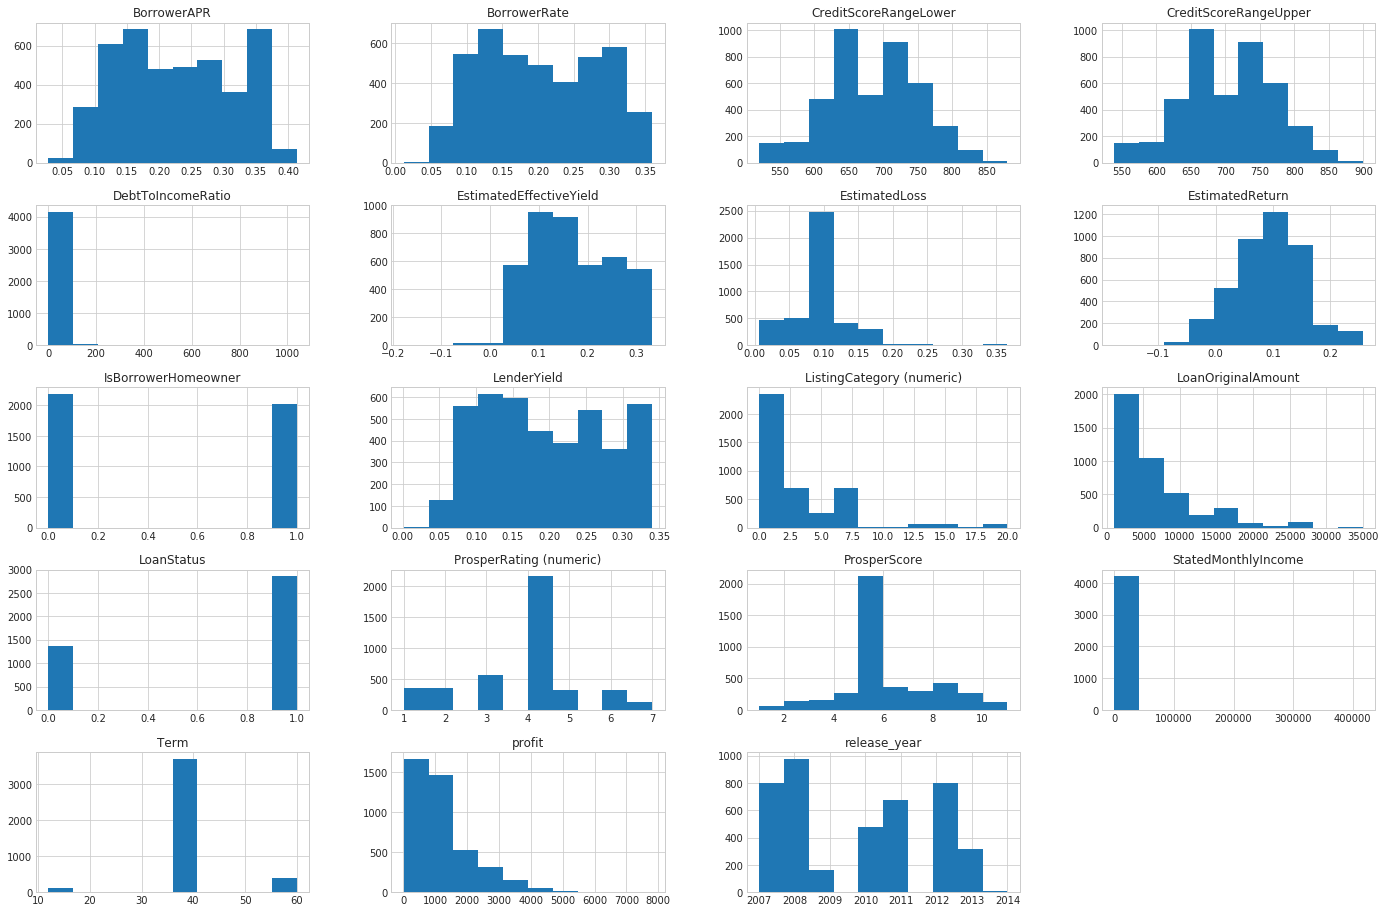

In [246]:
#histogram for numerical variables
df3.hist(figsize=(24, 16));

### Prosper loans only have a term of 12, 36 or 60 months. the most common is the term of 3 years. 

In [247]:
#count values of loans with Term 
df3["Term"].value_counts()

36    3704
60     391
12     119
Name: Term, dtype: int64

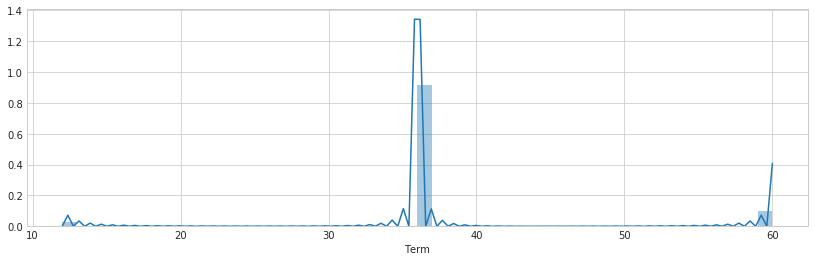

In [248]:
#distplot of loans with Term 
sns.distplot(df3["Term"])

* The mean interest rate (without fees)is 20.43%.
* The standard deviation is 8.24%.  
* The lowest 25% of borrowers are paying 13.55%. 
* The top 25% of borrowers are paying from 27% to 36%.

In [249]:
#descriptive statistics with Borrower Rate
df3["BorrowerRate"].describe()

count    4214.000000
mean        0.204323
std         0.082443
min         0.011500
25%         0.135500
50%         0.199100
75%         0.271200
max         0.360000
Name: BorrowerRate, dtype: float64

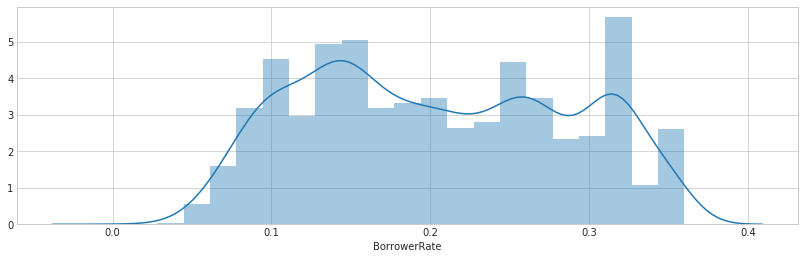

In [250]:
#distplot of loans with Borrower Rate  
sns.distplot(df3["BorrowerRate"])

### The demand for small loans is increasing, with an average of 6500 dollars with outlier of 35000 dollars.

In [251]:
#descriptive statistics with Loan Original Amount
df3["LoanOriginalAmount"].describe()

count     4214.000000
mean      6490.339820
std       5253.385914
min       1000.000000
25%       3000.000000
50%       5000.000000
75%       8500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

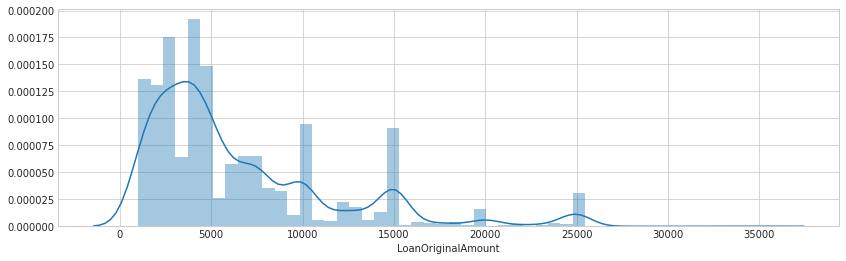

In [252]:
#distplot of loans with Loan Original Amount
sns.distplot(df3["LoanOriginalAmount"])

### The profit average per loan is 1235 dollars with Standard deviation is 970 & outlier of 7800 dollars.

In [253]:
#descriptive statistics with Loan profit
df3["profit"].describe()

count    4214.000000
mean     1234.778347
std       970.833714
min        11.500000
25%       534.877500
50%      1003.400000
75%      1593.750000
max      7804.350000
Name: profit, dtype: float64

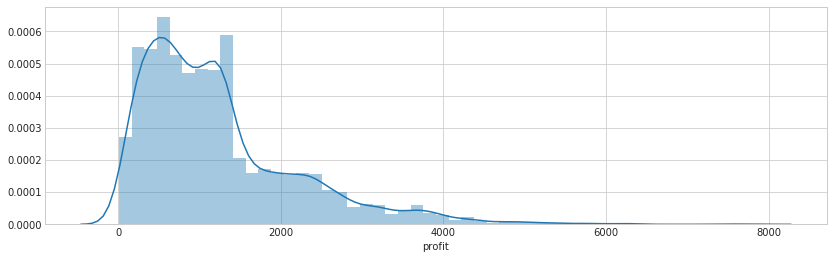

In [254]:
#distplot of loans with Loan profit
sns.distplot(df3["profit"])

 ### Bivariate Exploration

#### This statstic & plot are too interested and answer about very important question, gaving a strong advisies to investors to continue investment with (NH, SD, NM & MA) states.

In [283]:
#select 2 parameters
#sum of parameter (profit) based on group by with parameter (BorrowerState)
#display first 10 records only
df3.groupby('BorrowerState').profit.sum()[:10]

BorrowerState
AK      5025.1000
AL     88994.6554
AR     36035.4721
AZ     90005.6150
CA    772826.3411
CO     86845.3500
CT     57548.0750
DC     18551.4723
DE      8867.9500
FL    323092.1985
Name: profit, dtype: float64

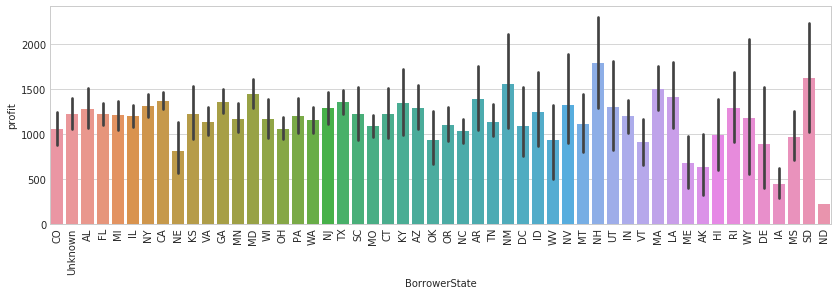

In [284]:
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="BorrowerState", y="profit", data=df3)
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 

In [143]:
#select 2 parameters
#sum of parameter (Loan Status) based on group by with parameter (Borrower State)
#display first 10 records only
df3.groupby('BorrowerState').LoanStatus.sum()[:10]

BorrowerState
AK      6
AL     44
AR     15
AZ     44
CA    391
CO     63
CT     33
DC     14
DE      7
FL    189
Name: LoanStatus, dtype: int64

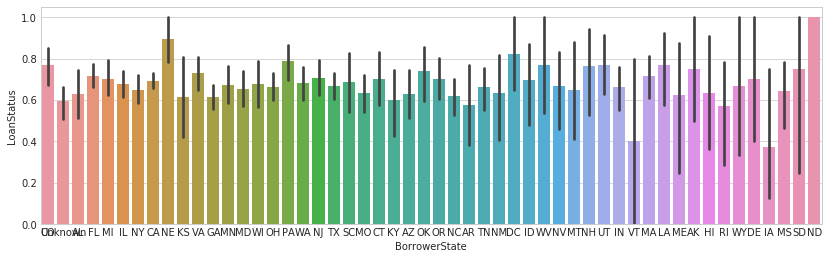

In [144]:
sns.barplot(x="BorrowerState", y="LoanStatus", data=df3)

* Loans to borrowers in (Kentucky) defaulted 40% of the time. 
* Loans to borrowers in (Washington) defaulted 17.64% of the time.

In [145]:
#KY_completed_loan_avg = mean with LoanStatus where BorrowerState = KY as ky
#DC_completed_loan_avg = mean with LoanStatus where BorrowerState = DC as dc
#KY_defaulted_loan_avg = 1 - KY_completed_loan_avg 
#DC_defaulted_loan_avg = 1 - DC_completed_loan_avg
ky, dc = df3[df3["BorrowerState"] == "KY"], df3[df3["BorrowerState"] == "DC"]
1 - ky["LoanStatus"].mean(), 1 - dc["LoanStatus"].mean()

(0.40000000000000002, 0.17647058823529416)

In [278]:
#replace with parameter ListingCategory (numeric) from numeric values to text values
#refer to the document to know the category of the listing
df3.replace(to_replace={"ListingCategory (numeric)": {0: "Not_Available", 1: "Debt_Consolidation", 2: " Home_Improvement", 3: "Business", 4: "Personal_Loan",
                                                                5: "Student_Use", 6: "Auto", 7: "Other", 8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic_Procedure", 
                                                                11: "Engagement_Ring", 12: "Green_Loans", 13: "Household_Expenses", 14: "Large_Purchase", 
                                                                15: "Medical/Dental", 16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 
                                                                20: "Wedding_Loans"}}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [279]:
#rename column ListingCategory (numeric) to ListingCatloan
df3.rename(index=str, columns={"ListingCategory (numeric)": "ListingCatloan"}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [280]:
#count values of loans with ListingCatloan 
df3["ListingCatloan"].value_counts()[:10]

Debt_Consolidation    1590
Not_Available          762
Other                  547
Business               383
 Home_Improvement      318
Personal_Loan          203
Auto                   145
Household_Expenses      62
Student_Use             56
Medical/Dental          35
Name: ListingCatloan, dtype: int64

#### This statstic & plot are too interested and answer about very important question, gaving a strong advisies to investors to continue investment in (Wedding, Taxes, Cosmetic Procedure & Business) categories.

In [281]:
#select 2 parameters
#sum of parameter (profit) based on group by with parameter (ListingCatloan)
#display first 10 records only
df3.groupby('ListingCatloan').profit.sum()[:10]

ListingCatloan
 Home_Improvement     4.204637e+05
Auto                  1.229538e+05
Baby&Adoption         1.244500e+03
Boat                  4.331350e+03
Business              5.348375e+05
Cosmetic_Procedure    7.080400e+03
Debt_Consolidation    2.187413e+06
Engagement_Ring       6.494900e+03
Household_Expenses    7.054880e+04
Large_Purchase        2.761825e+04
Name: profit, dtype: float64

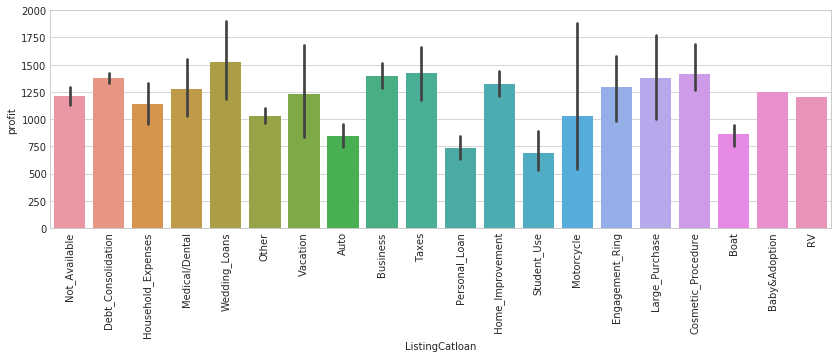

In [282]:
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="ListingCatloan", y="profit", data=df3)
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 

In [149]:
#select 2 parameters
#sum of parameter (Loan Status) based on group by with parameter (ListingCatloan)
#display first 10 records only
df3.groupby('ListingCatloan').LoanStatus.sum()[:10]

ListingCatloan
 Home_Improvement      228
Auto                   113
Baby&Adoption            0
Boat                     5
Business               251
Cosmetic_Procedure       3
Debt_Consolidation    1100
Engagement_Ring          3
Household_Expenses      32
Large_Purchase          12
Name: LoanStatus, dtype: int64

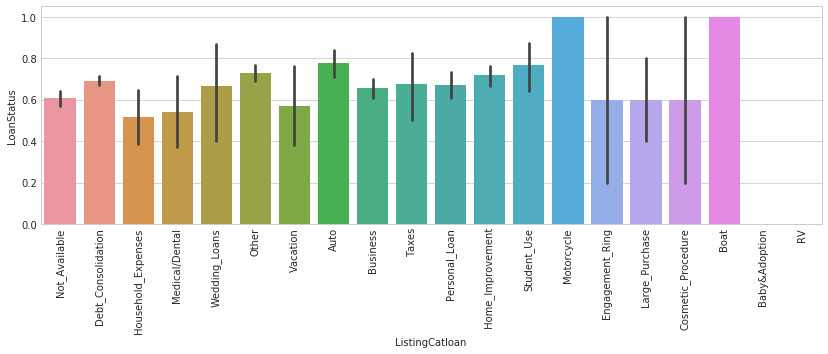

In [150]:
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="ListingCatloan", y="LoanStatus", data=df3)
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 

* Wedding loans defaulting 33.33% of the time.
* RV loans defaulting 100% of the time also baby loan.
* While people seem to completely pay boat and motorcycle loans quite frequently.

In [151]:
#Wedding_Loans_completed_loan_avg = mean with LoanStatus where ListingCatloan = Wedding_Loans as wedding
#RV_completed_loan_avg = mean with LoanStatus where ListingCatloan = RV as rv
#Wedding_Loans_defaulted_loan_avg = 1 - Wedding_Loans_completed_loan_avg  
#RV_defaulted_loan_avg = 1 - RV_completed_loan_avg
wedding, rv = df3[df3["ListingCatloan"] == "Wedding_Loans"], df3[df3["ListingCatloan"] == "RV"]
1 - wedding["LoanStatus"].mean(), 1 - rv["LoanStatus"].mean()

(0.33333333333333337, 1.0)

### The Prosper score & Prosper rating seems to be doing a good job of predicting default, With higher ratings defaulting less frequently.
### There is a high degree of variance in default rate for those highly rated loans.

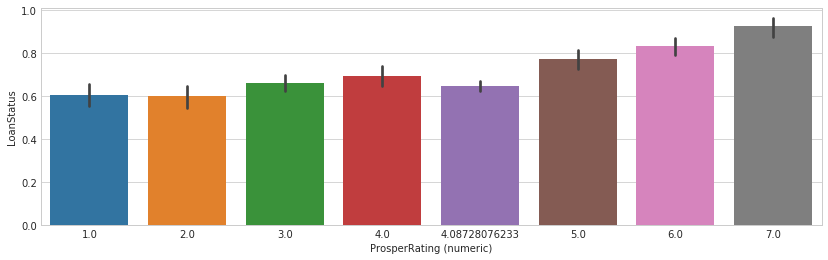

In [152]:
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="ProsperRating (numeric)", y="LoanStatus", data=df3)

### Total number of loans per Prosper Score.

In [153]:
#select 2 parameters
#count of parameter (Loan Status) based on group by with parameter (ProsperScore)
df3.groupby('ProsperScore').LoanStatus.count()

ProsperScore
1.000000       64
2.000000      140
3.000000      160
4.000000      264
5.000000      321
5.944207     1793
6.000000      361
7.000000      302
8.000000      420
9.000000      265
10.000000     123
11.000000       1
Name: LoanStatus, dtype: int64

### Total number of completed loans per Prosper Score.

In [154]:
#select 2 parameters
#sum of parameter (Loan Status) based on group by with parameter (ProsperScore)
df3.groupby('ProsperScore').LoanStatus.sum()

ProsperScore
1.000000       38
2.000000       76
3.000000       93
4.000000      159
5.000000      205
5.944207     1159
6.000000      250
7.000000      208
8.000000      331
9.000000      222
10.000000     116
11.000000       0
Name: LoanStatus, dtype: int64

### Total number of defaulted loans = total number of loans - total number of completed loans.

### The highest Prosper Scores (11) seems is a one loan defaulted.

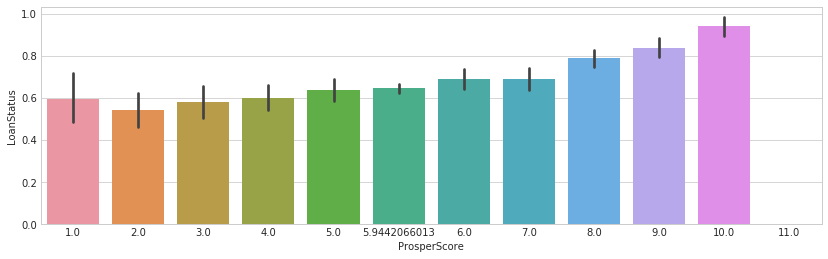

In [155]:
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="ProsperScore", y="LoanStatus", data=df3)

### Borrowers homeowners default less than whos paying the rent

In [156]:
#select 2 parameters
#sum of parameter (Loan Status) based on group by with parameter (IsBorrowerHomeowner)
df3.groupby('IsBorrowerHomeowner').LoanStatus.sum()

IsBorrowerHomeowner
False    1464
True     1393
Name: LoanStatus, dtype: int64

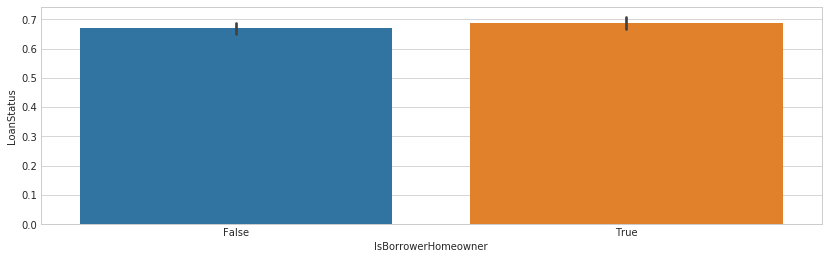

In [157]:
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="IsBorrowerHomeowner", y="LoanStatus", data=df3)

* Part-time employees defaulted less often than full-time employees.
* Employment status Other defaulted  more  than those not employed, retired & self-employed.

In [158]:
#select 2 parameters
#sum of parameter (Loan Status) based on group by with parameter (EmploymentStatus)
df3.groupby('EmploymentStatus').LoanStatus.sum()

EmploymentStatus
Employed         1086
Full-time        1457
Not employed       19
Other              38
Part-time          67
Retired            39
Self-employed     151
Name: LoanStatus, dtype: int64

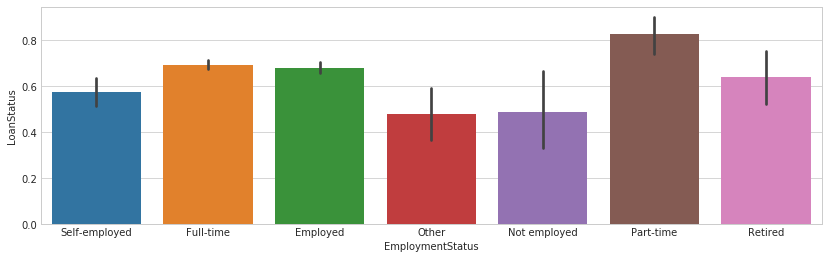

In [159]:
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(y="LoanStatus", x="EmploymentStatus", data=df3)

* People with higher stated incomes defaulted less often than those with lower incomes.
* peoples always default when the ratio of debt to income is higher.

(0, 0.8)

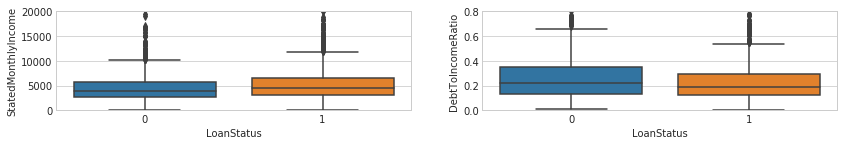

In [160]:
fig = plt.figure()
#plot on left
ax1 = fig.add_subplot(221)
#boxplot with 2 parameters by identifying X-axis & Y-axis & set y-axis limit from 0 to 20000
sns.boxplot(x="LoanStatus", y="StatedMonthlyIncome", data=df3).set_ylim([0,20000])
#plot on right
ax2 = fig.add_subplot(222)
#boxplot with 2 parameters by identifying X-axis & Y-axis & set y-axis limit from 0 to 0.8
sns.boxplot(x="LoanStatus", y="DebtToIncomeRatio", data=df3).set_ylim([0,0.8])

* The distribution of the loan amount seems to be consistent between both classes.
* The distribution of the term seems to be consistent between both classes.

(10, 60)

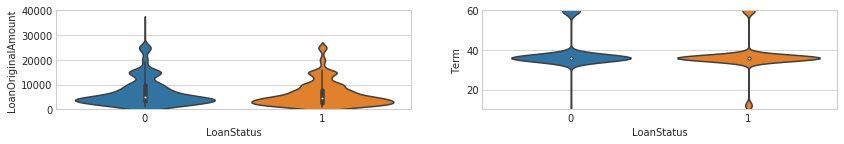

In [161]:
fig = plt.figure()
#plot on left
ax1 = fig.add_subplot(221)
#violinplot with 2 parameters by identifying X-axis & Y-axis & set y-axis limit from 0 to 40000
sns.violinplot(x="LoanStatus", y="LoanOriginalAmount", data=df3).set_ylim([0,40000])
#plot on right 
ax2 = fig.add_subplot(222)
#violinplot with 2 parameters by identifying X-axis & Y-axis & set y-axis limit from 10 to 60
sns.violinplot(x="LoanStatus", y="Term", data=df3).set_ylim([10, 60])

### The credit scores seem to be doing a good job of predicting default, with higher ratings defaulting less frequently.

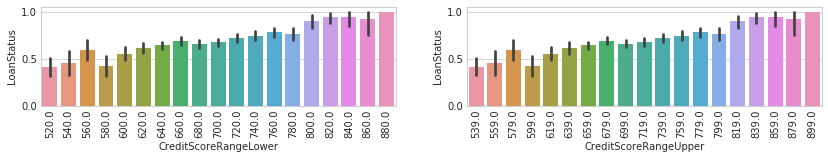

In [162]:
fig = plt.figure()
#plot on left
ax1 = fig.add_subplot(221)
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=df3)
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 
#plot on right
ax2 = fig.add_subplot(222)
#barplot with 2 parameters by identifying X-axis & Y-axis
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=df3)
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 

### The credit score range seems to be constant at score of 19.

In [163]:
#Credit_Score_range = CreditScoreRangeUpper - CreditScoreRangeLower
Credit_Score_range = df3["CreditScoreRangeUpper"] - df3["CreditScoreRangeLower"]
#value count with Credit_Score_range
Credit_Score_range.value_counts()

19.0    4214
dtype: int64

### Remove the redundancy by dropping CreditScoreRangeUpper and renaming the lower bound "CreditScore".

In [164]:
#delete CreditScoreRangeUpper
df3.drop("CreditScoreRangeUpper", axis=1, inplace=True)
#rename the CreditScoreRangeLower to CreditScore
df3.rename(index=str, columns={"CreditScoreRangeLower": "CreditScore"}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### this plots are too interested and answer about very important question, gaving a strong advisies to investors to continue investment in lendig loans for the next period.

#### We notice a strong & positive relationship between the Loan Original Amount & Stated Monthly Income. 
#### We notice a strong & positive relationship between the Loan Original Amount & Profit. 

* Grand total of loans amount = 27350292
* Net profit of lending loans =  5203356
* Capital turnover to 3 years = 19% 
* With consideration the average is for all completed & defaulted loans with average of term is 36 months

In [257]:
total_loans_amount = df3['LoanOriginalAmount'].sum()
total_loans_amount

27350292

In [258]:
net_profit = df3['profit'].sum()
net_profit

5203355.9522000002

In [259]:
capital_turnover = net_profit / total_loans_amount
capital_turnover

0.190248643495287

Text(0.5,1,'Relationship between Loans Amount & Monthly Income')

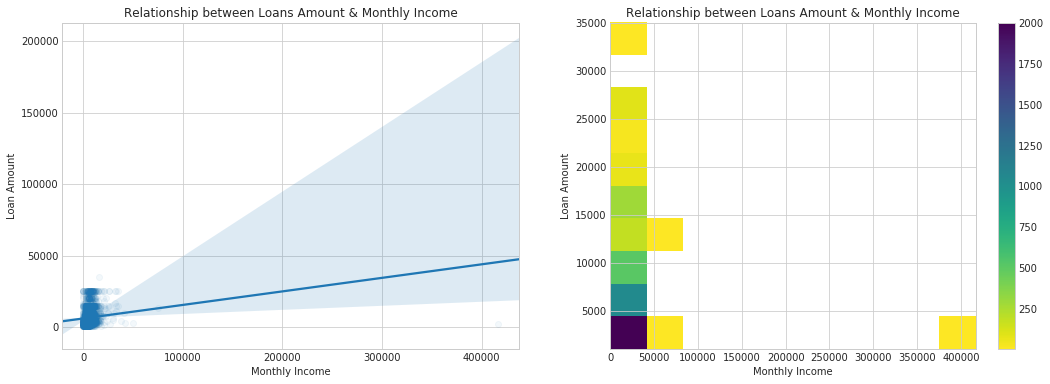

In [260]:
#scatter plot of LoanOriginalAmount vs. BorrowerRate, with log transform on LoanOriginalAmount axis
#set the size figure to accommodate two plots
plt.figure(figsize = [18, 6])
#plot on left
plt.subplot(1, 2, 1)
#The scatter_kws helps specifying the opaqueness of the data points. 
#The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque.
sns.regplot(data = df3, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', scatter_kws={'alpha':1/20});
#x-axis label
plt.xlabel('Monthly Income')
#y-axis label
plt.ylabel('Loan Amount')
#title of the graph
plt.title('Relationship between Loans Amount & Monthly Income')
#plot on right
plt.subplot(1, 2, 2)
#hist2d plot with 2 parameters
#use cmin to set a minimum bound of counts 
#use cmap to reverse the color map. 
plt.hist2d(data = df3, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', cmin=0.5, cmap='viridis_r')
plt.colorbar()
#x-axis label
plt.xlabel('Monthly Income')
#y-axis label
plt.ylabel('Loan Amount');
#title of the graph
plt.title('Relationship between Loans Amount & Monthly Income')

Text(0.5,1,'Relationship between Loans Amount & profit')

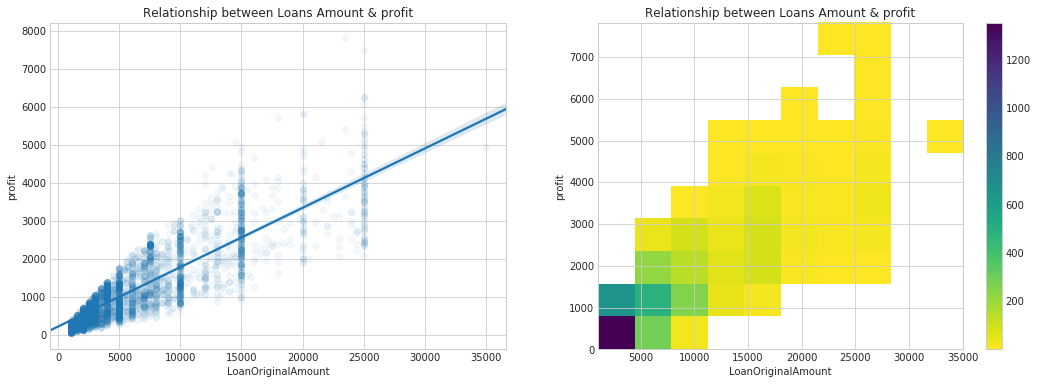

In [170]:
#scatter plot of Term vs. BorrowerRate, with log transform on Term axis
#set the size figure to accommodate two plots
plt.figure(figsize = [18, 6])
#plot on left
plt.subplot(1, 2, 1)
#The scatter_kws helps specifying the opaqueness of the data points. 
#The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque.
sns.regplot(data = df3, x = 'LoanOriginalAmount', y = 'profit', scatter_kws={'alpha':1/20});
#x-axis label
plt.xlabel('LoanOriginalAmount')
#y-axis label
plt.ylabel('profit')
#title of the graph
plt.title('Relationship between Loans Amount & profit')
#plot on right
plt.subplot(1, 2, 2)
#hist2d plot with 2 parameters
#use cmin to set a minimum bound of counts 
#use cmap to reverse the color map.
plt.hist2d(data = df3, x = 'LoanOriginalAmount', y = 'profit', cmin=0.5, cmap='viridis_r')
plt.colorbar()
#x-axis label
plt.xlabel('LoanOriginalAmount')
#y-axis label
plt.ylabel('profit');
#title of the graph
plt.title('Relationship between Loans Amount & profit')

### This plots are too interested and answer about very important question, making a strong prediction of non-default in the period after 2014.

* Strong rise of Loan Original Amount & Stated Monthly Income after 2010 to 2014.
* The average of debt-to-income ratio falls sharply after 2012 to 2013 and then gradually declines during 2014.

In [103]:
#define function (line) with parameters (column_x,column_y)
def line(column_x,column_y):
    #set graph size
    plt.figure(figsize=(12,6))
    #plotting the graph
    plt.plot(df.groupby(column_x)[column_y].mean())
    df.groupby(column_x)[column_y].mean().describe()
    maxi = df.groupby(column_x)[column_y].mean().idxmax()
    mini = df.groupby(column_x)[column_y].mean().idxmin()
    return maxi,mini,plt

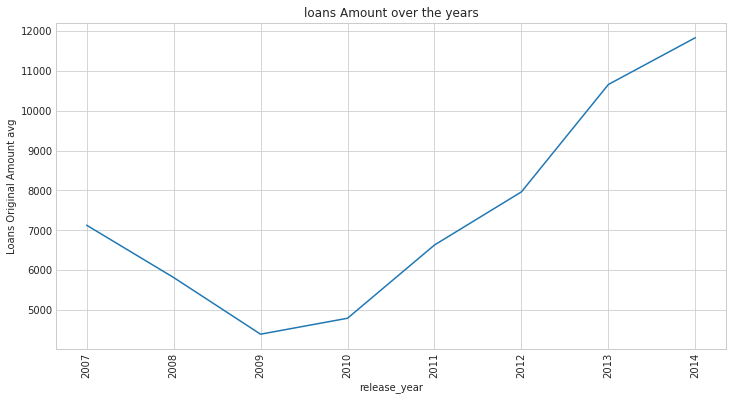

In [104]:
#Calling function line with parameters ('release_year','LoanOriginalAmount') 
maxi,mini,plt=line('release_year','LoanOriginalAmount')
#x-axis label
plt.xlabel('release_year', fontsize = 10)
#y-axis label
plt.ylabel('Loans Original Amount avg', fontsize = 10)
#title of the graph
plt.title('loans Amount over the years')
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 
plt.show()

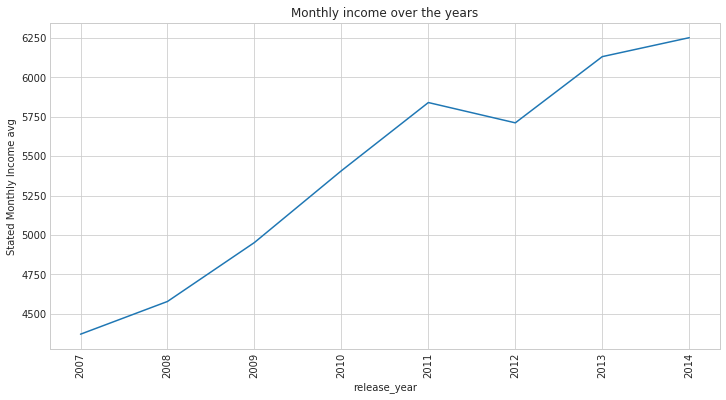

In [105]:
#Calling function line with parameters ('release_year','StatedMonthlyIncome') 
maxi,mini,plt=line('release_year','StatedMonthlyIncome')
#x-axis label
plt.xlabel('release_year', fontsize = 10)
#y-axis label
plt.ylabel('Stated Monthly Income avg', fontsize = 10)
#title of the graph
plt.title('Monthly income over the years')
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 
plt.show()

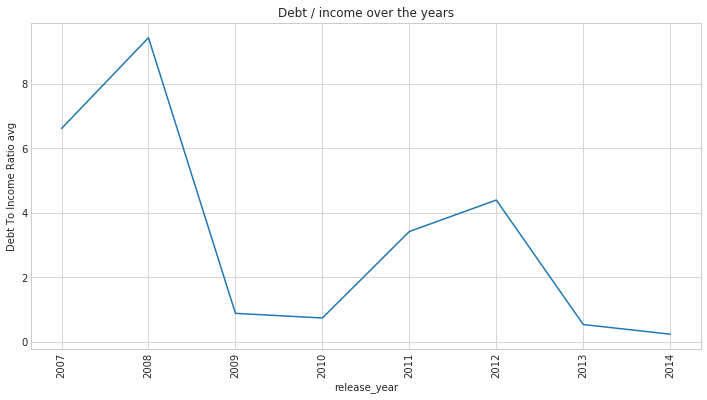

In [106]:
#Calling function line with parameters ('release_year','DebtToIncomeRatio') 
maxi,mini,plt=line('release_year','DebtToIncomeRatio')
#x-axis label
plt.xlabel('release_year', fontsize = 10)
#y-axis label
plt.ylabel('Debt To Income Ratio avg', fontsize = 10)
#title of the graph
plt.title('Debt / income over the years')
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 
plt.show()

### Multivariate Exploration

###### The loans that default have a higher interest rate than loans that are paid completely, even when controlling for credit score.

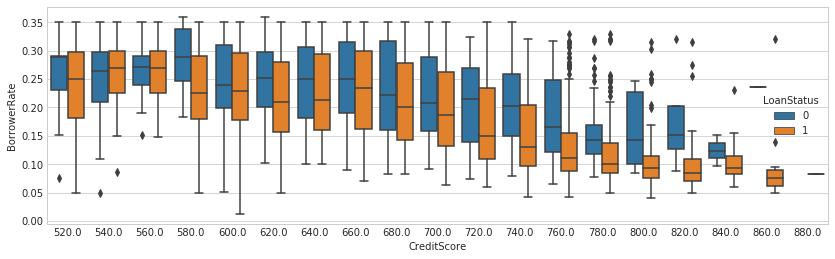

In [107]:
sns.boxplot(x="CreditScore", y='BorrowerRate', hue='LoanStatus', data=df3)

### In long-term loans, we find the completed loans achieved profits more than defaulted although the small Borrower rate compared to short-term loans

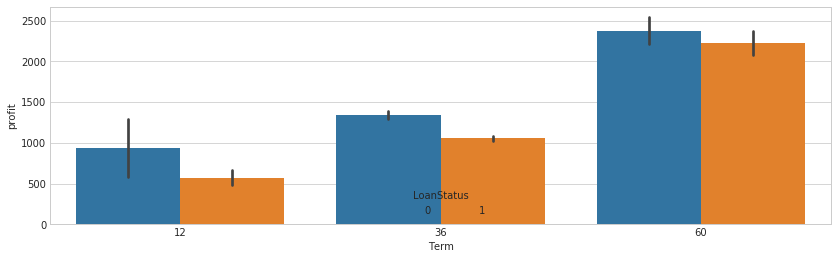

In [276]:
ax = sns.barplot(data = df3, x = 'Term', y = 'profit', hue = 'LoanStatus')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'LoanStatus')

* In long-term loans, we find increasing of amount of completed loans & defaulted
* Almost completed loans equal to defaulted at the long-term
* In medium-term loans, we find an littel increase of mean to completed loans
* In short-term loans, we find an hieght increase of volume to completed loans 
* In short-term loans, we find an hieght increase of mean of (6000 dollars  to completed loans & mean ~ 4000 dollars to defaulted

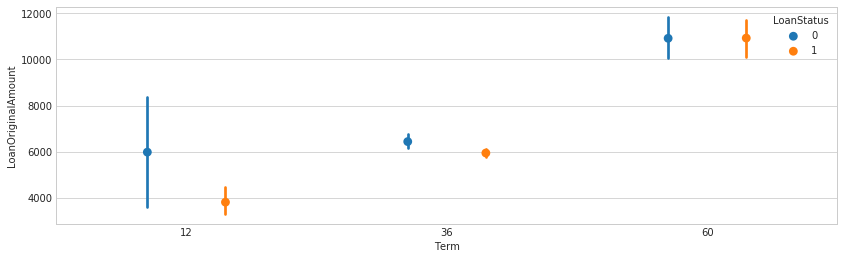

In [272]:
ax = sns.pointplot(data = df3, x = 'Term', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")

* The distribution of completed loans in the short-term seems to be more higher than defaulted
* The distribution of completed loans in the medium-term seems to be little higher than defaulted
* The distribution of both classes in the long-term seems to be consistent 
* The distribution of completed loans over the years seems to be more higher than defaulted

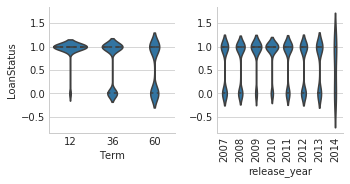

In [111]:
g = sns.PairGrid(data = df3, x_vars = ['Term', 'release_year'], y_vars = ['LoanStatus'])
g.map(sns.violinplot, inner = 'quartile')
#get the current tick locations and labels rotate vertical
locs, labels = plt.xticks(rotation=90) 

##### Continue to explore the data to address your additional research questions. Add more headers as needed  if you have more questions to investigate.

<a id='conclusions'></a>
## Conclusions

> **Investigation Overview:** <br>In this investigation, I wanted to look at the characteristics of loans that can be used to predict a default or pay. The main focus was on the main variable, which is the loan status and its relationship to a package of quantitative and categorical data <br> Quantitative data: borrower rate, debt to income ratio, stated monthly income and  loan original amount <br> the categorical data: listing category,  borrower state, employment status and release year.

> **Dataset overview:** <br>The population consisted of approximately 9669 loans with total  variables are 82 on each loan,  included the Prosper comapny Score, Credit Score as well as additional measurements.
<br>The Sample consisted of approximately 9034 loans with 23 variables on each loan.
<br>Fifty-eight data points were removed from the analysis due to inconsistencies or missing information and also all variables that out of our vission.

> **Recommendations:** 
<ul>
    <li>Assuming that the investors are one person represented by Prosper
    <li>And with the increase in the volume of demand by borrowers during the last three years
    <li>The strong relationship between the loans amoun and the profit realized
    <li>I think it would be a good idea to increase the amount of investment in lending,
        <br> especially in specific states  (NH, SD, NM & MA)
        <br> and specific categories  ( Wedding, Taxes, Cosmetic Procedure & Business)
 </ul>       

## limitations:
 <br>
The observations sure not be accurate, as statistical methods are not used to infer information and only basic visualizations are used.
<br>
Some rows are filled from data set due to non existent values and other were deleted , this may effect the analysis.
<br>
More data is required & time

## Refrances:

<ul>
<li>Classroom
<li>Weekly zoom sesions
<li>Community
<li>Searchs
</ul>
<ol>    
<li>https://www.youtube.com/watch?v=AYorFcI1MTU
<li>https://stackoverflow.com
<li>https://pandas.pydata.org
<li>https://www.python.org
</ol>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])